Pridobitev podatkov

In [11]:
import pandas as pd
import glob
import warnings
import platform
from copy import copy
warnings.filterwarnings('ignore')

if (platform.system() == 'Windows'):
    l = glob.glob('data/*.csv')
    for i in range(len(l)):
        l[i] = l[i].split('\\')[-1].upper()

    # slovar poti do .csv datotek
    csv_data = {data.split('\\')[1].split('.')[0].upper():data for data in glob.glob('data/*.csv')}
    
    # MAC IN LINUX IMATA DRUGACNE OZNAKE
else:
    l = glob.glob('data/*.csv')
    for i in range(len(l)):
        l[i] = l[i].split('/')[-1].upper()

    # slovar poti do .csv datotek
    csv_data = {data.split('/')[1].split('.')[0].upper():data for data in glob.glob('data/*.csv')}

In [12]:
dataframes = {}
for key, value in csv_data.items():
    df = pd.read_csv(csv_data[key], sep=';', encoding='cp1250', skipinitialspace = True)
    dataframes[key.upper()] = df

for df1 in dataframes.values():
    df1.columns = ['MesecStoritve' if x == 'DatumStoritve' else x for x in df]

In [27]:
dataframes_copy = copy(dataframes)
frames = [copy(dataframes_copy['KD2009'])]
for i in range(10, 21):
    frames.append(copy(dataframes_copy['KD20'+str(i)]))

all_data = pd.concat(frames)
all_data

# tu se naredi preslikava glede iz neberljive oblike datuma v berljivo obliko
mesci = ['Januar', 'Februar', 'Marec', 'April', 'Maj', 'Junij', 'Julij', 'Avgust', 'September', 'Oktober', 'November', 'December']
mesci2 = []
leta = []

# this dataframe is the one used for the analysis
full_KD = all_data

for i in full_KD['MesecStoritve']:
    mesec = str(i)[:-4]
    leto = str(i)[-4:]

    leta.append(leto)
    mesci2.append(mesci[int(mesec) - 1])


full_KD.rename(columns={'MesecStoritve': 'CasovnaOznaka'}, inplace=True)
full_KD['MesecStoritve'] = mesci2
full_KD['LetoStoritve'] = leta
full_KD['LetoStoritve'] = full_KD['LetoStoritve'].astype(int)

In [14]:
color_pallete = ['#FF0170', '#F72585', '#B5179E', '#7209B7', '#560BAD', '#480CA8', '#3A0CA3', '#3F37C9', '#4361EE', '#4895EF', '#4CC9F0', '#82D8F2']

In [72]:
import geopandas as gpd



SPLOŠNA        8933
GOSPODARSKA     697
Name: GospodarskiKriminal, dtype: int64

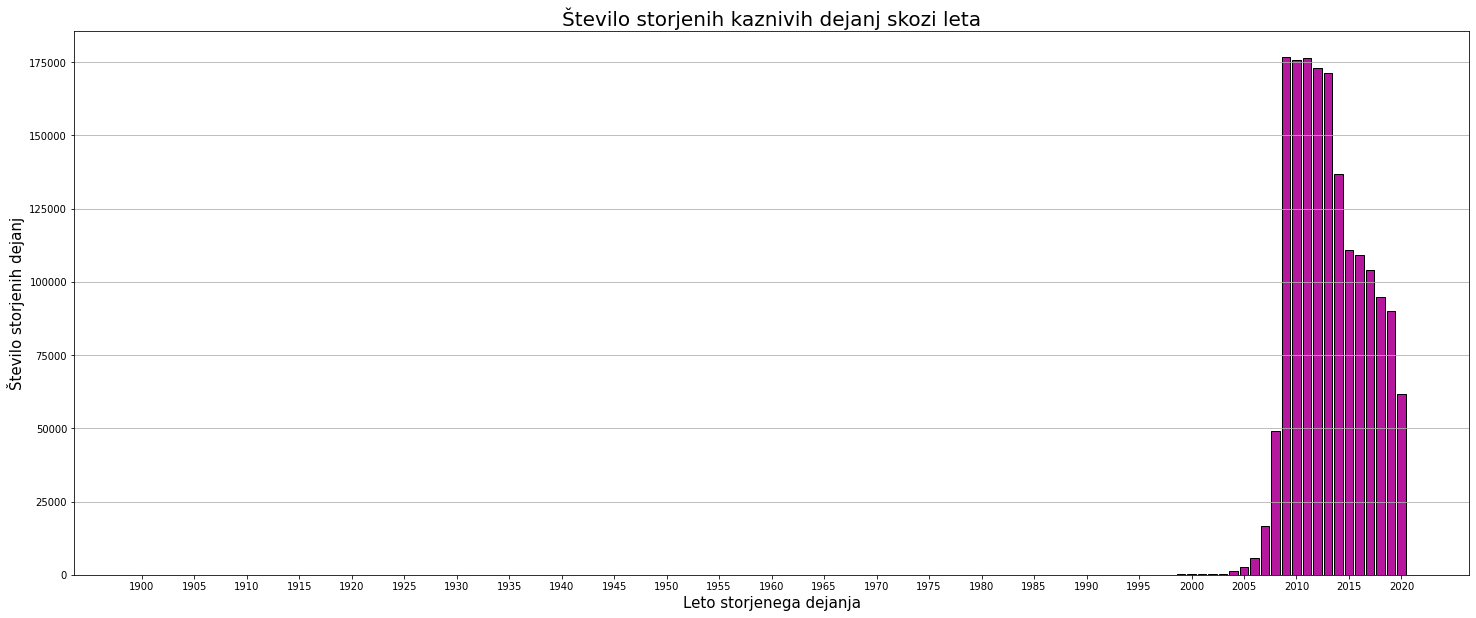

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

all_years = copy(all_data)
leta = all_years['LetoStoritve'].value_counts().sort_index()
x = list(leta.index)
y = list(leta)

plt.figure(figsize=(25,10))
plt.bar(x, y, color=color_pallete[2], edgecolor='black')
plt.grid(axis='y')
plt.title('Število storjenih kaznivih dejanj skozi leta', fontsize=20)
plt.xlabel('Leto storjenega dejanja', fontsize=15)
plt.ylabel('Število storjenih dejanj', fontsize=15)
plt.xticks(np.arange(x[0], x[-1]+5, step=5))
plt.show()

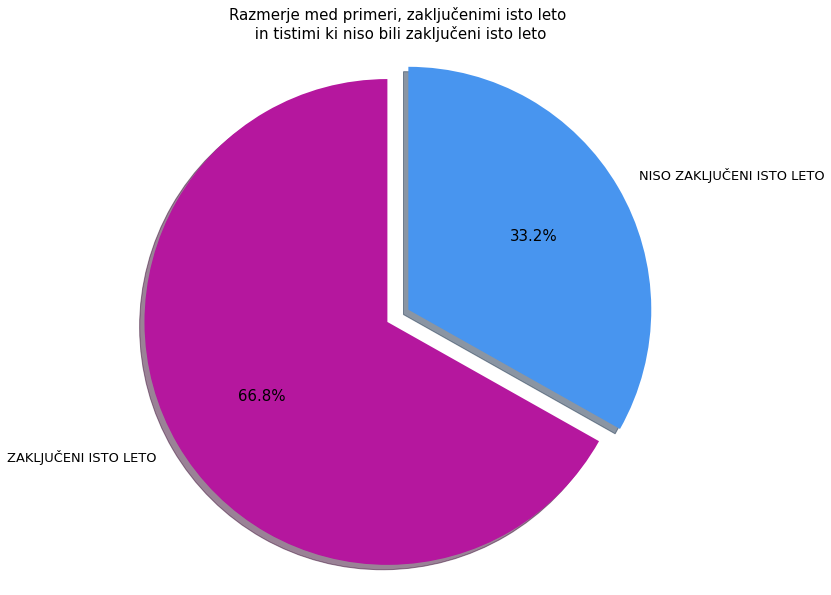

In [17]:
df_istoleto = copy(all_data)
df_not_istoleto = copy(all_data)
df_istoleto = df_istoleto[df_istoleto['LetoZakljucnegaDokumenta'] == df_istoleto['LetoStoritve']]
df_not_istoleto = df_not_istoleto[df_not_istoleto['LetoZakljucnegaDokumenta'] != df_not_istoleto['LetoStoritve']]
zalkjuceni_istoleto = len(df_istoleto)
ne_zalkjuceni_istoleto = len(df_not_istoleto)

x = ['ZAKLJUČENI ISTO LETO', 'NISO ZAKLJUČENI ISTO LETO']
y = [int(zalkjuceni_istoleto), int(ne_zalkjuceni_istoleto)]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
fig1.set_size_inches(10,10)
patches, texts, autotexts = ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%', shadow=True, startangle=90, colors=[color_pallete[2], color_pallete[9]])
ax1.axis('equal')
ax1.set_title('Razmerje med primeri, zaključenimi isto leto\n in tistimi ki niso bili zaključeni isto leto', fontsize=15)
for t in autotexts:
    t.set_fontsize(15)
for t in texts:
    t.set_fontsize(13)
plt.show()

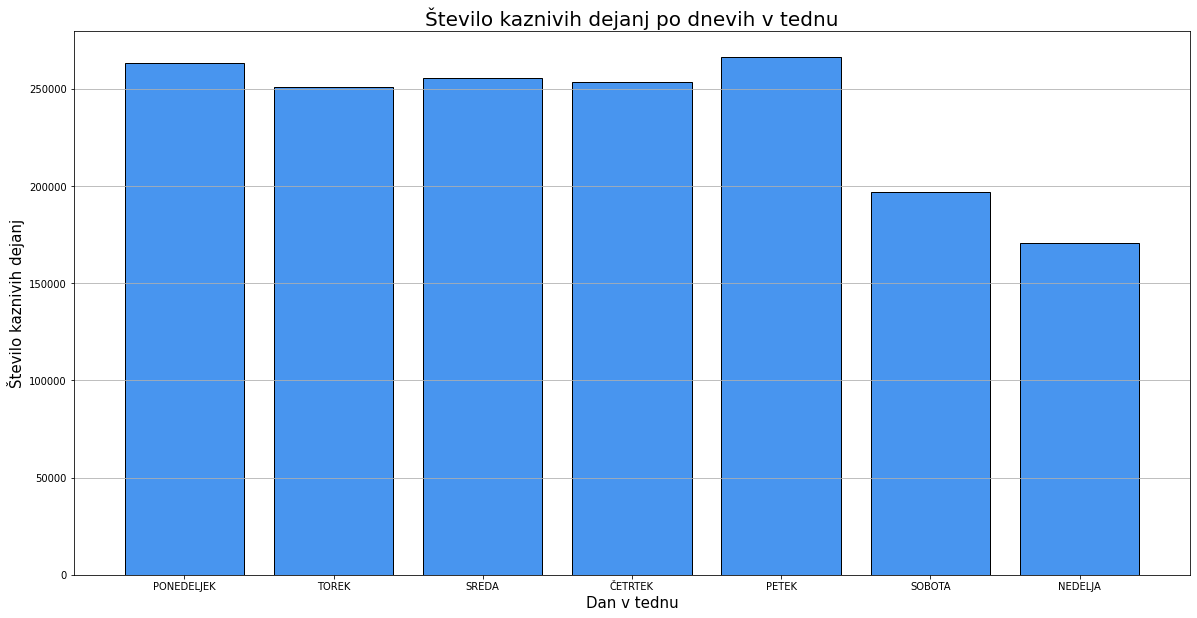

In [18]:
dnevi = all_years.DanVTednu.value_counts().sort_index()
x = ['PONEDELJEK', 'TOREK', 'SREDA', 'ČETRTEK', 'PETEK', 'SOBOTA', 'NEDELJA']
y = [dnevi.PONEDELJEK, dnevi.TOREK, dnevi.SREDA, dnevi.ČETRTEK, dnevi.PETEK, dnevi.SOBOTA, dnevi.NEDELJA]

plt.figure(figsize=(20,10))
plt.bar(x, y, color=color_pallete[9], edgecolor='black')
plt.title('Število kaznivih dejanj po dnevih v tednu', fontsize=20)
plt.xlabel('Dan v tednu', fontsize=15)
plt.ylabel('Število kaznivih dejanj', fontsize=15)
plt.grid(axis='y')
plt.show()

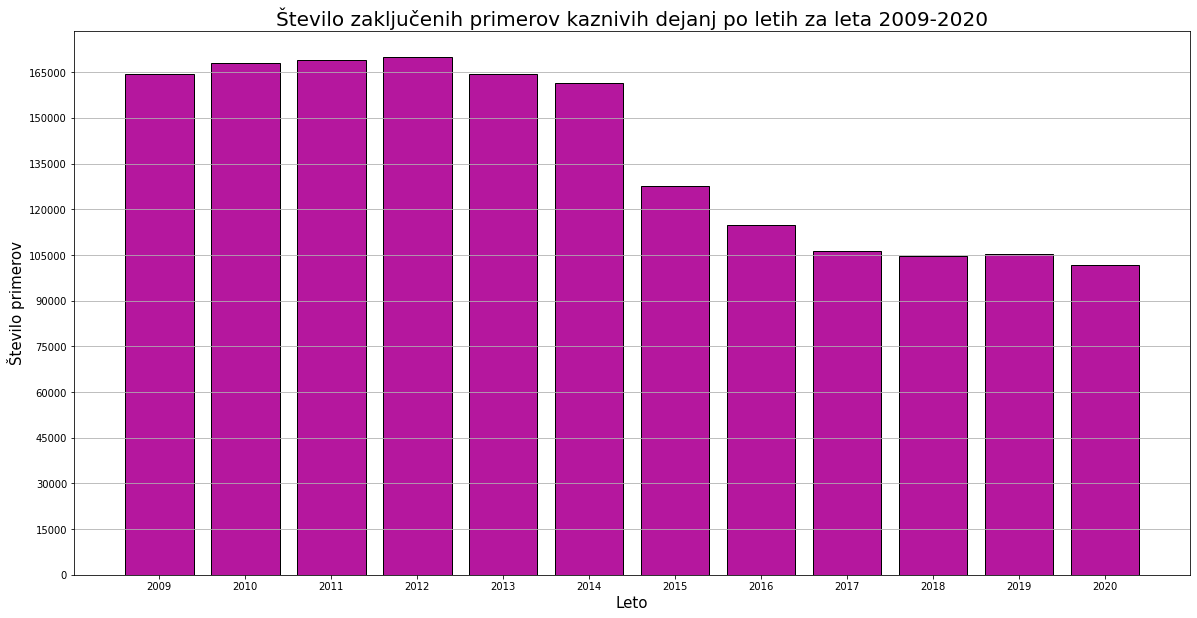

In [19]:
time_dataframes = {k:v for k,v in dataframes.items()}

l_df = copy(list(time_dataframes.values()))

po_letih = [len(df) for df in l_df]

plt.figure(figsize=(20,10))

# subplot 1. prikaz kriminalističih primerov po letih za leta 2009-2020
plt.bar(['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'], po_letih, color=color_pallete[2], edgecolor='black')
plt.yticks(np.arange(0, 180000, step=15000))
plt.grid(axis='y')
plt.title('Število zaključenih primerov kaznivih dejanj po letih za leta 2009-2020', fontsize=20)
plt.ylabel('Število primerov', fontsize=15)
plt.xlabel('Leto', fontsize=15)
plt.show()

**Ugotavljanje v katerih urah se zgodi največ kriminala**  
Pri tej analizi uporabimo podatke za vsa leta po stolpcu **UraStoritve** ter jih povprečimo da dobimo bolj splošne rezultate

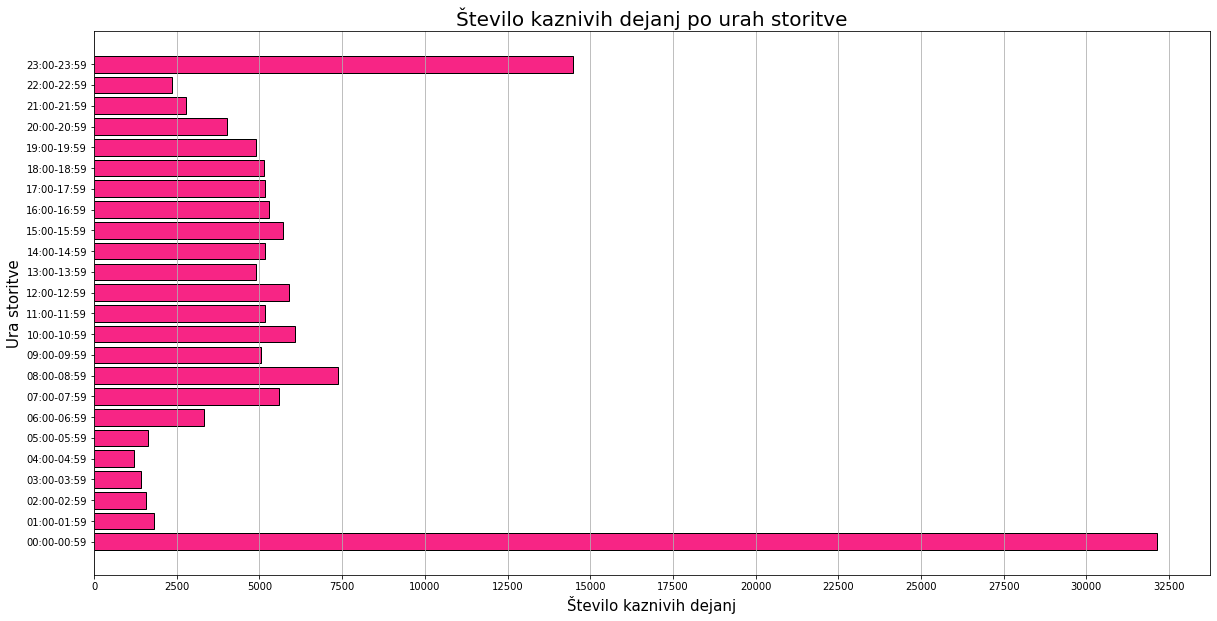

In [20]:
dataframes_fixed_dates = {}

for key, value in time_dataframes.items():
    df1 = copy(time_dataframes[key])
    df1['MesecStoritve'] = df1['MesecStoritve'].apply(lambda x: str(x)[:-4]+'.'+str(x)[-4:])
    df1['MesecStoritve'] =  pd.to_datetime(df1['MesecStoritve'], format='%m.%Y')
    dataframes_fixed_dates[key] = df1

ure_vse = []
povp_ure = []
ure = [
    '00:00-00:59',
    '01:00-01:59',
    '02:00-02:59',
    '03:00-03:59',
    '04:00-04:59',
    '05:00-05:59',
    '06:00-06:59',
    '07:00-07:59',
    '08:00-08:59',
    '09:00-09:59',
    '10:00-10:59',
    '11:00-11:59',
    '12:00-12:59',
    '13:00-13:59',
    '14:00-14:59',
    '15:00-15:59',
    '16:00-16:59',
    '17:00-17:59',
    '18:00-18:59',
    '19:00-19:59',
    '20:00-20:59',
    '21:00-21:59',
    '22:00-22:59',
    '23:00-23:59',
]

i = 0
for key, value in dataframes_fixed_dates.items():
    ure_vse.append(list(value['UraStoritve'].value_counts().sort_index()))
    i += 1

for i in range(len(ure_vse[1])):
    x = 0
    for ura in ure_vse:
        x += ura[i]
    povp_ure.append(x/len(ure_vse))

plt.figure(figsize=(20,10))
plt.barh(ure, povp_ure, color='#F72585', edgecolor='black')
plt.grid(axis='x')
plt.xticks(np.arange(0, 35000, step=2500))
plt.title('Število kaznivih dejanj po urah storitve', fontsize=20)
plt.ylabel('Ura storitve', fontsize=15)
plt.xlabel('Število kaznivih dejanj', fontsize=15)
plt.show()

**UGOTOVITVE:** Iz ugotovitev se največ kaznivih dejanj zgodi med **23:00 in 01:00**. To se zdi smiselno, saj večina ljudi takrat zapustijo lokale(verjetno vinjeni) in se zato zgodi več kaznivih dejanj. Število kaznivih dejanj pade v urah spanca **01:00-06:00** ter **21:00-23:00**. Podnevi kazniva dejanja narastejo, ampak še vedno ne tako kot med 23:00 in 01:00.